In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [4]:
#Here we are reading the dataset which is in the CSV format
data=pd.read_csv("E:\TY\Semester 6\Data minning and ware housing\project\diabetes.csv")

In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.shape

(768, 9)

In [8]:
# Summary statistics
describe=data.describe()

In [9]:
# Data types
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
# Missing values
data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# Display the first few rows
head=data.head()

In [12]:
zero_val = (data == 0).sum()
zero_val

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

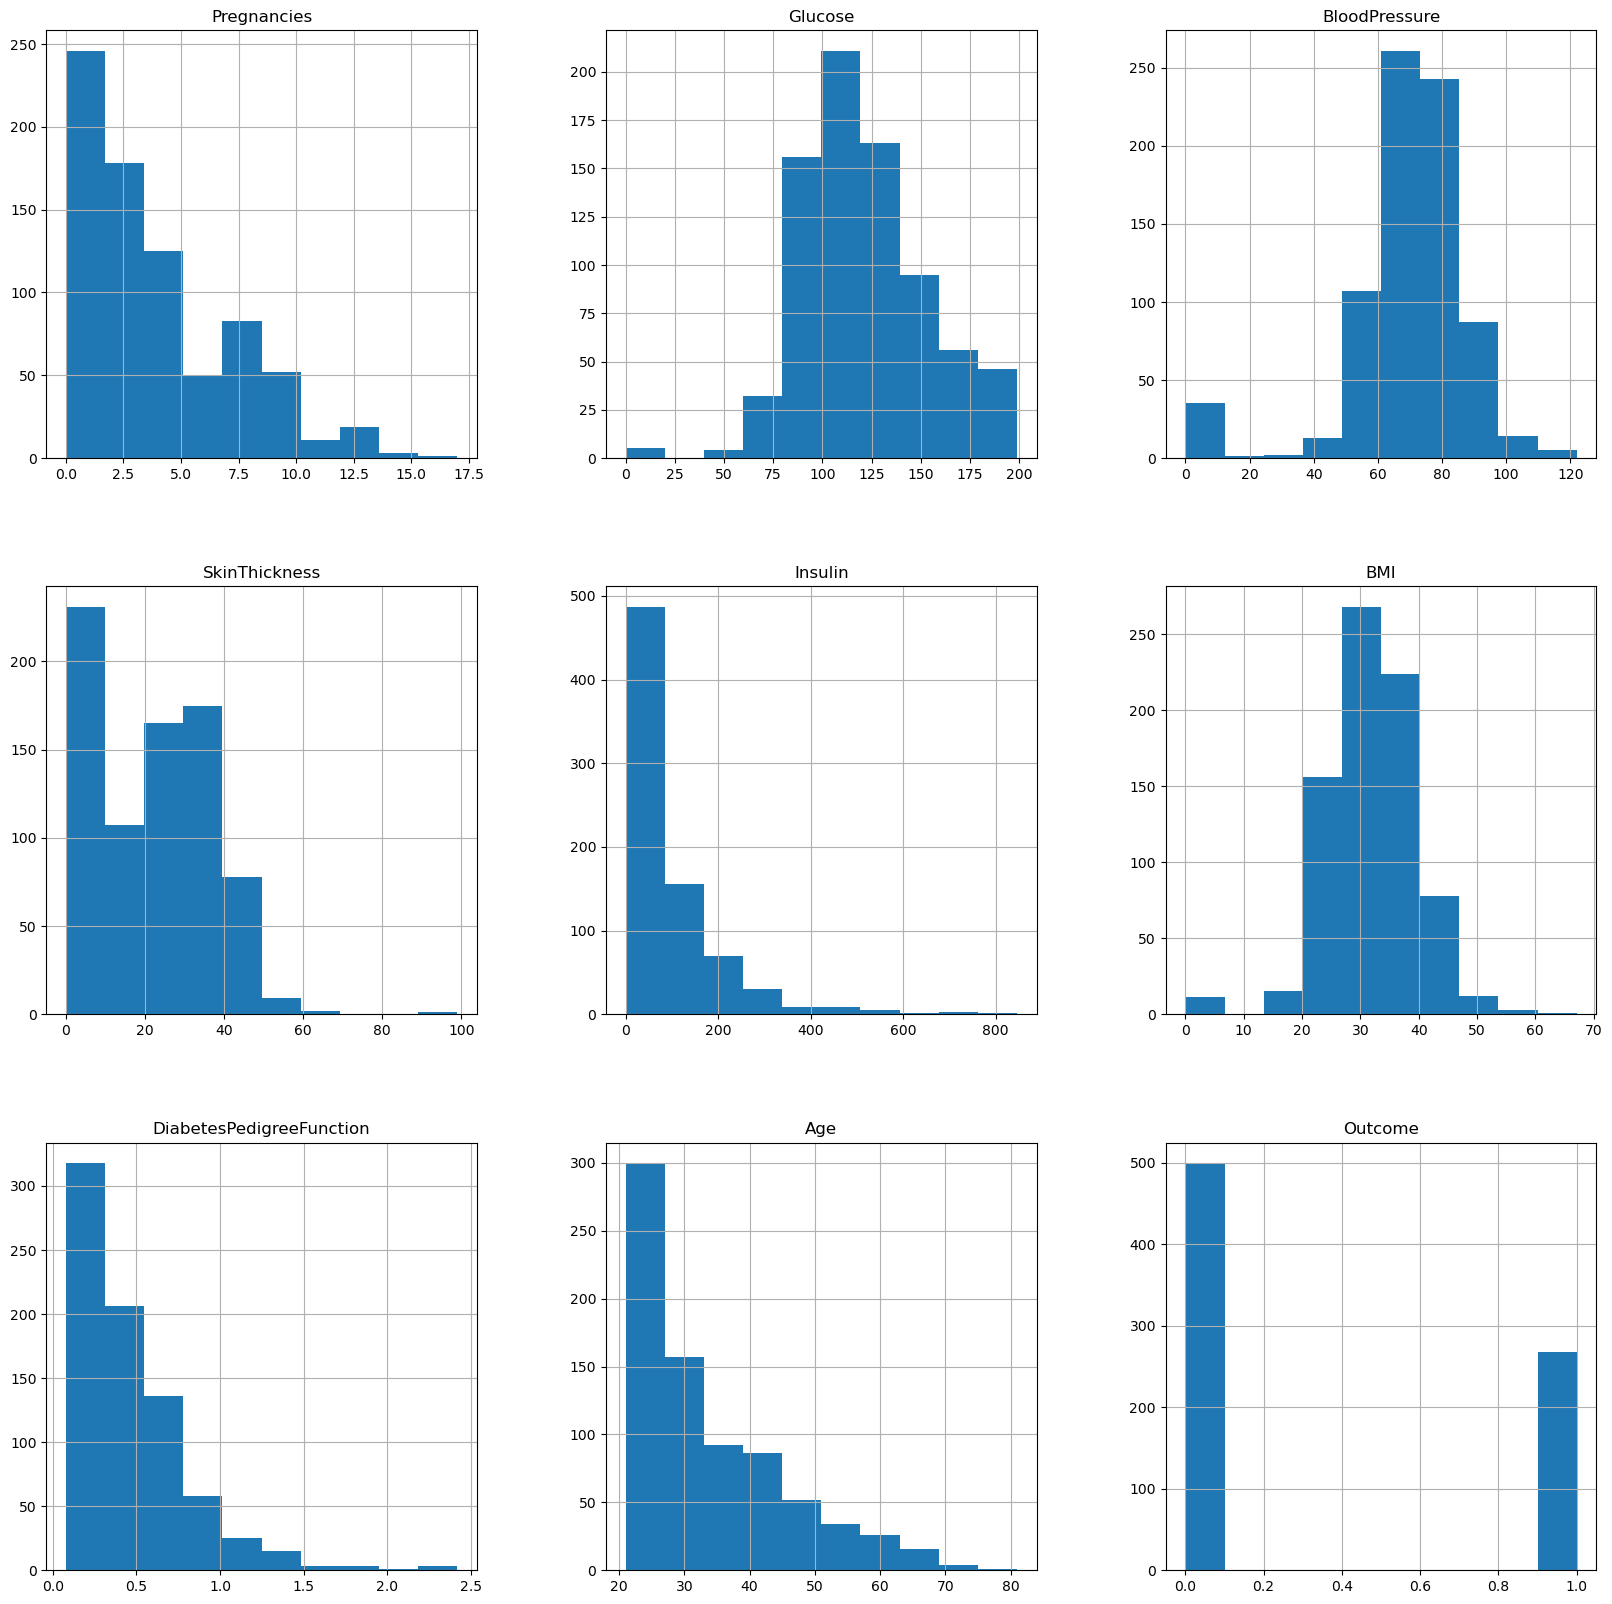

In [13]:
#Plotting the data distribution plots before removing zeros
data.hist(figsize = (20,20))

In [14]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

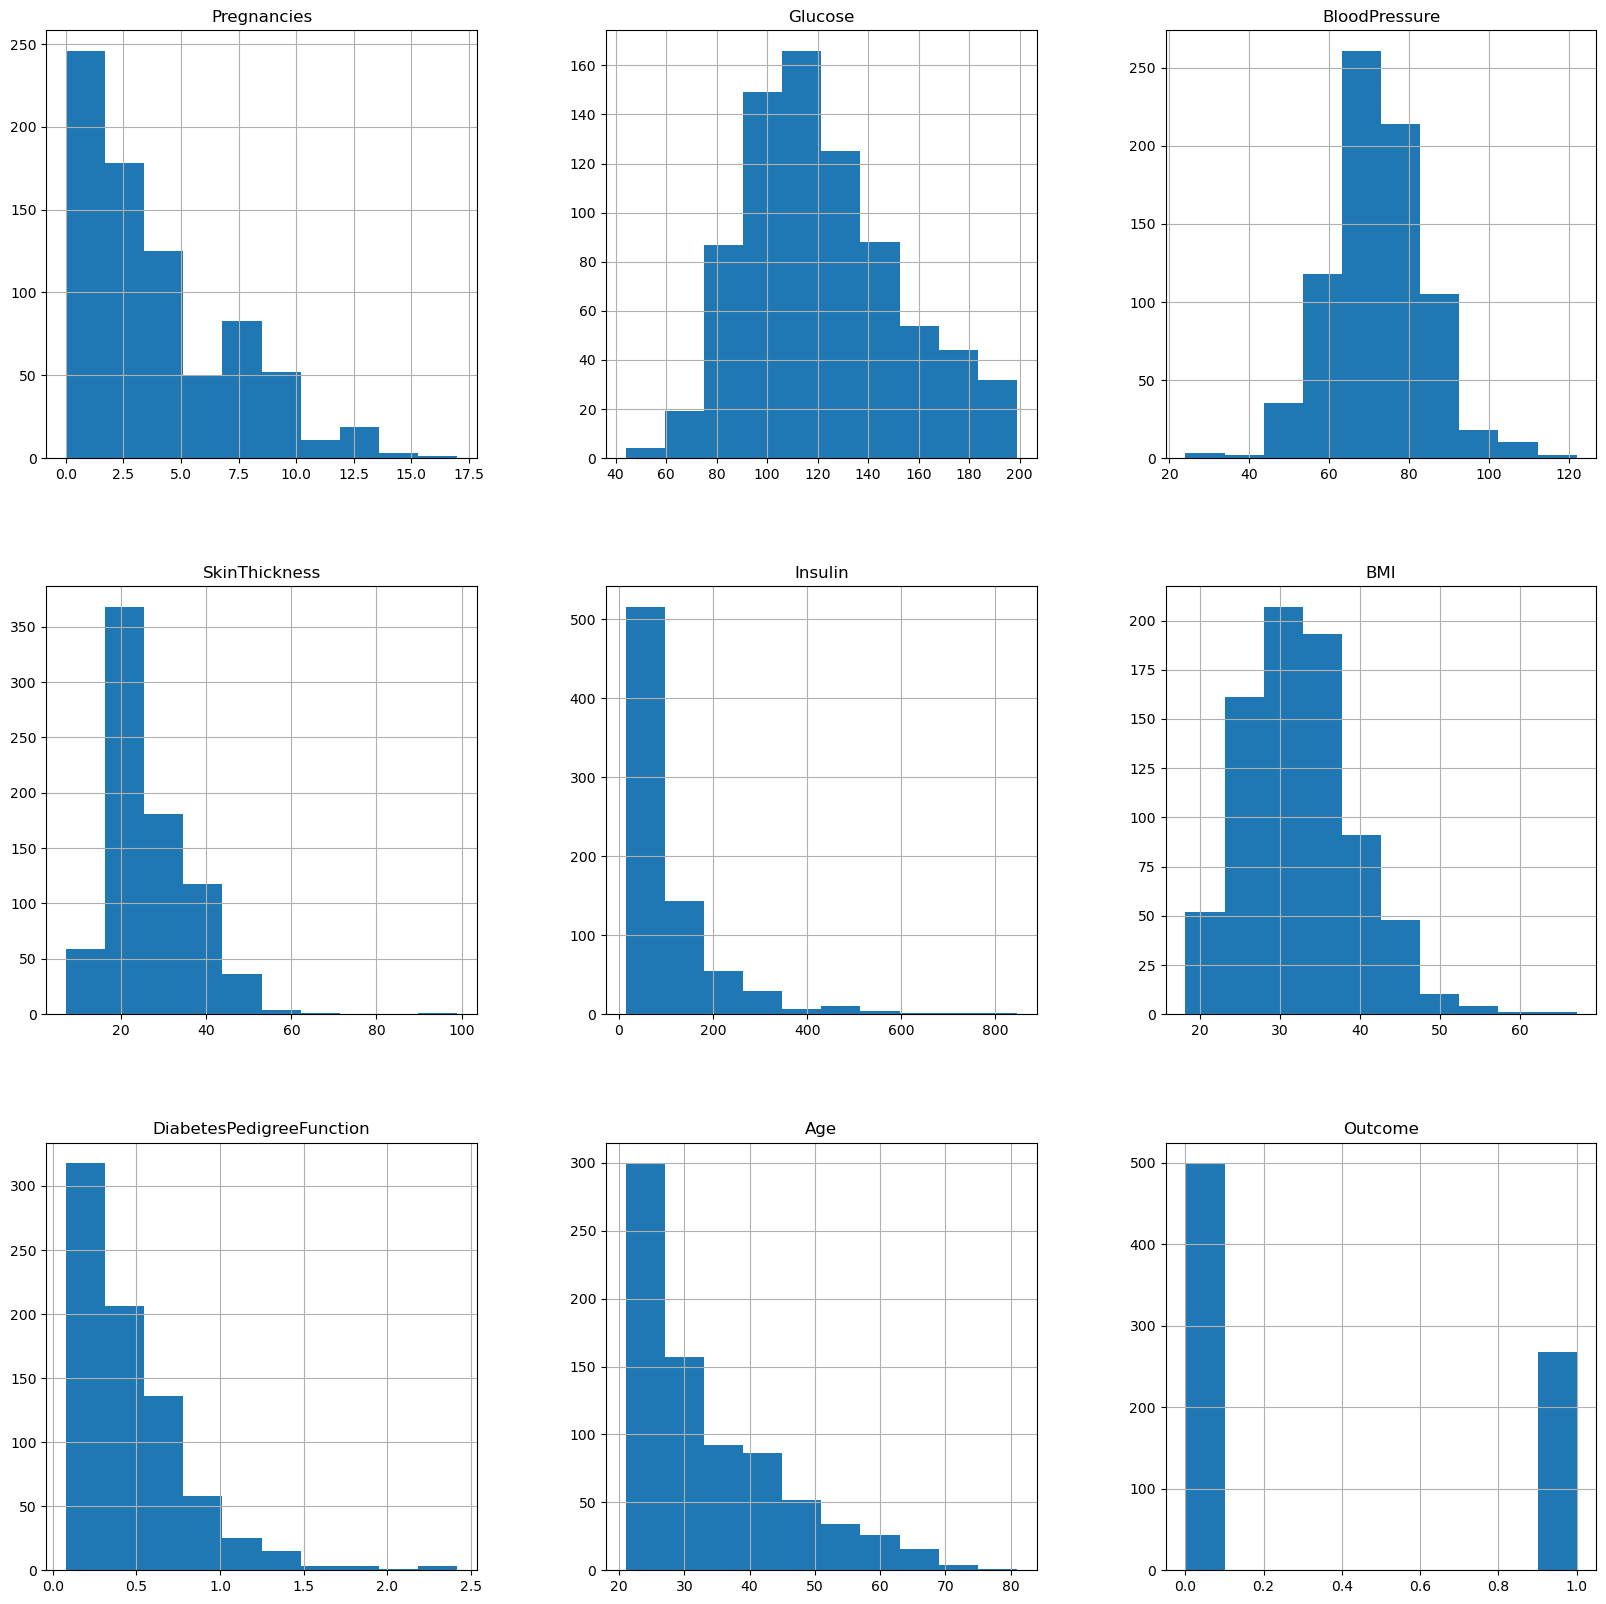

In [15]:
# Histogram for a numerical variable
data.hist(figsize = (20,20))

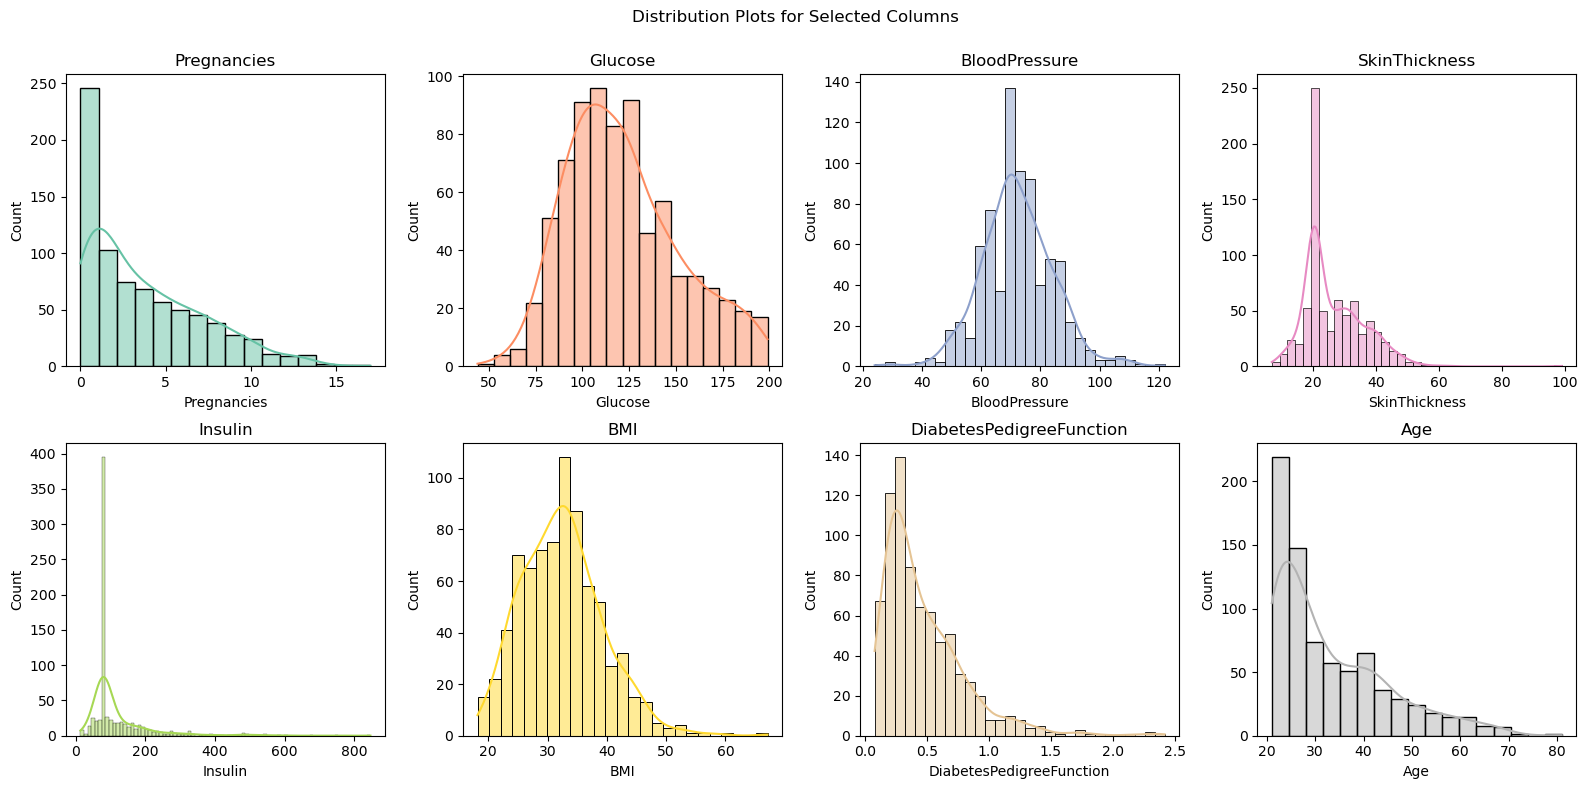

In [16]:
columns_to_plot = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle("Distribution Plots for Selected Columns")
palette = sns.color_palette("Set2")
# Create distribution plots for each column
for i, (column, color) in enumerate(zip(columns_to_plot, palette)):
    row = i // 4
    col = i % 4
    sns.histplot(data[column], kde=True, color=color, ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

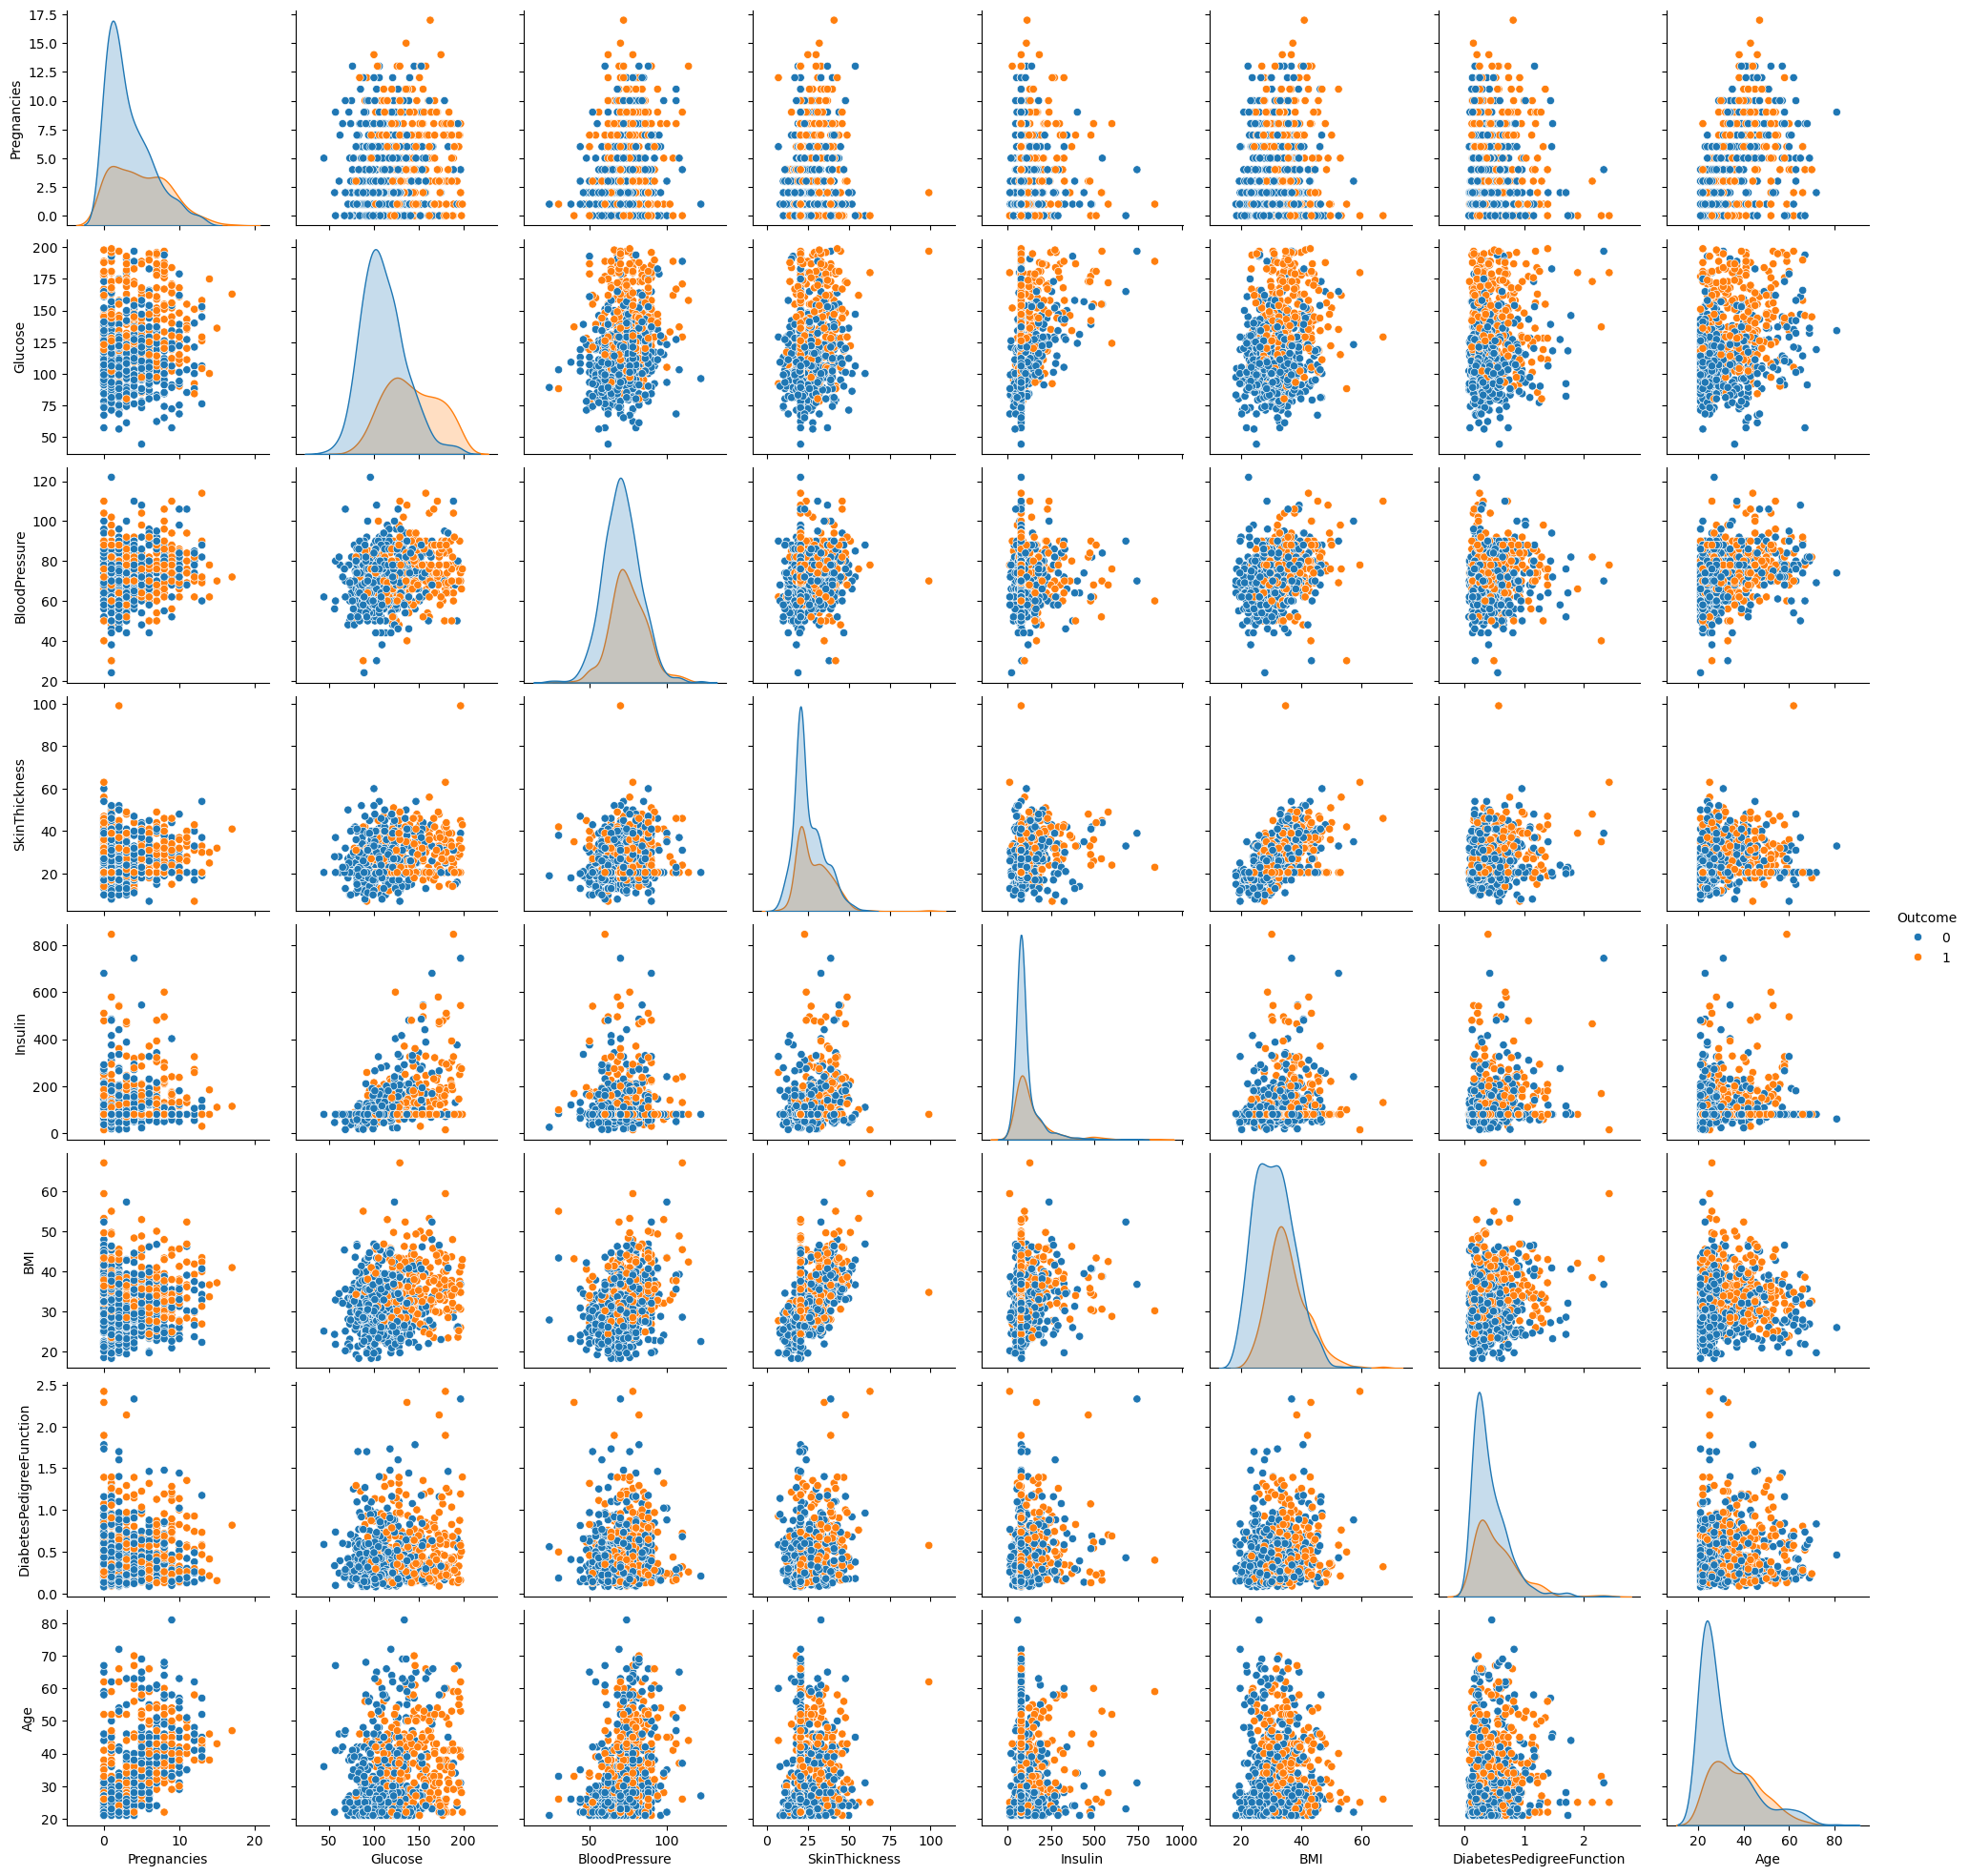

In [17]:
sns.pairplot(data,hue='Outcome')

In [18]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: >

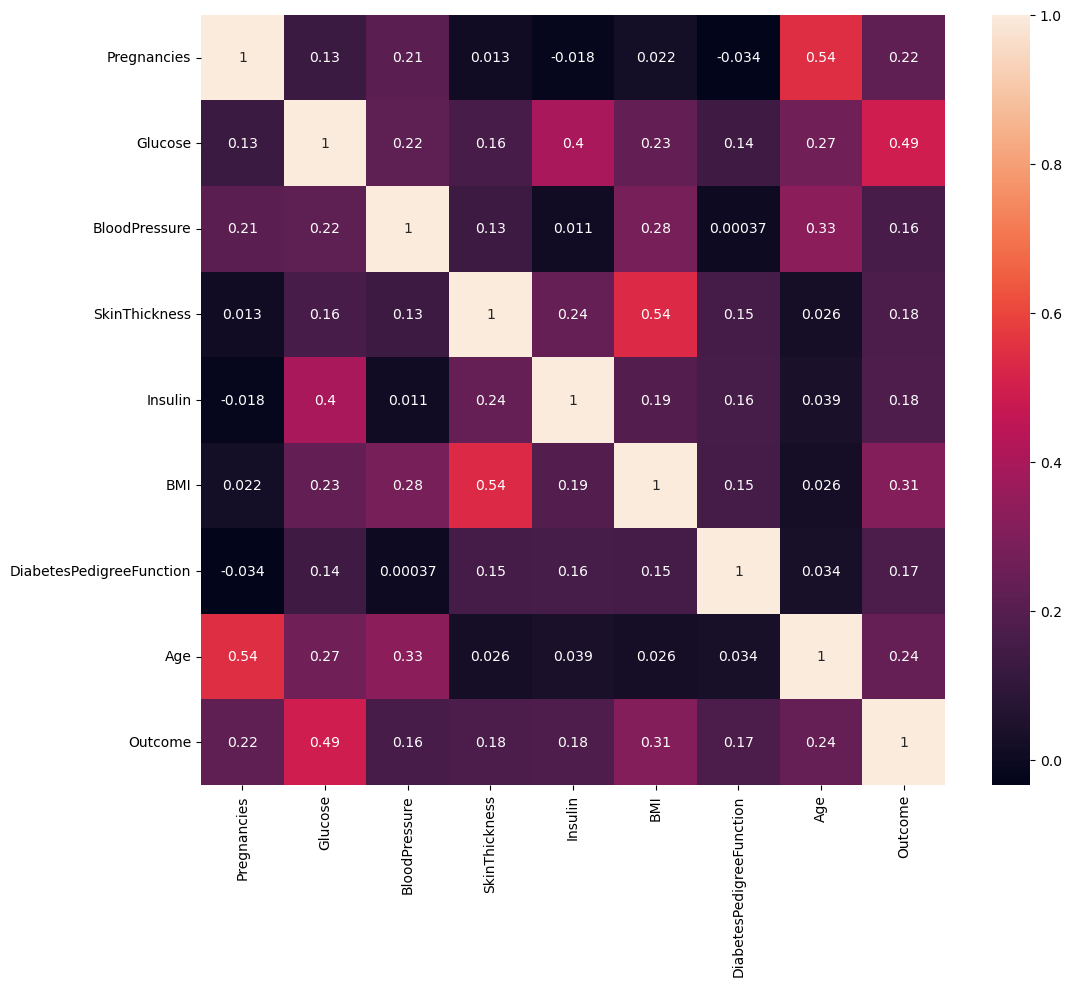

In [19]:
#Correlation analysis
corelation=data.corr()
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), annot =True)


In [20]:
#train_test_splitting of the dataset

x = data.drop('Outcome', axis=1)
# Getting Predicting Value
y = data['Outcome']


In [21]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x = pd.DataFrame(ss.fit_transform(data.drop('Outcome', axis=1)), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
x.head

<bound method NDFrame.head of      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.865276      -0.021044       0.872057 -0.417768  0.167255   
1      -0.844885 -1.205989      -0.516583       0.248678 -0.417768 -0.851535   
2       1.233880  2.015979      -0.681762      -0.630654 -0.417768 -1.331821   
3      -0.844885 -1.074480      -0.516583      -0.374700 -0.265107 -0.633222   
4      -1.141852  0.503626      -2.663916       0.872057  0.530423  1.549899   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.679954       0.309315       2.222711  0.659428  0.065376   
764    -0.547919  0.010468      -0.186224       0.040885 -0.417768  0.632988   
765     0.342981 -0.022409      -0.021044      -0.374700 -0.071599 -0.909751   
766    -0.844885  0.141977      -1.012121      -0.630654 -0.417768 -0.342140   
767    -0.844885 -0.942972      -0.186224       0.456471 -0.417768 -0.298477   

     Diab

In [22]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,)

In [23]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression(random_state = 0, penalty = 'l2')
logi.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [24]:
y_predict_logi = logi.predict(x_test)
acc= accuracy_score(y_test, y_predict_logi)
roc=roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

results = pd.DataFrame([['Logistic Regression',acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.766234,0.686275,0.636364,0.660377,0.737374


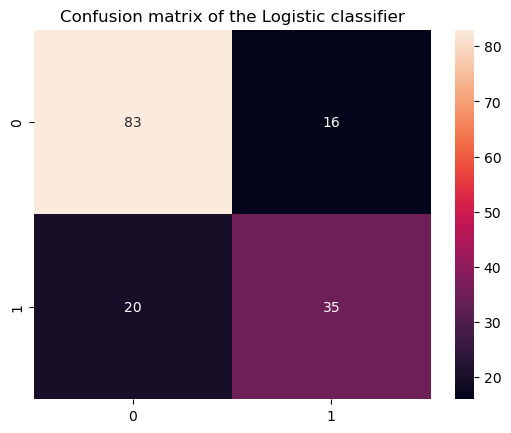

In [25]:
cm_logi = confusion_matrix(y_test, y_predict_logi)
plt.title('Confusion matrix of the Logistic classifier')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.show()

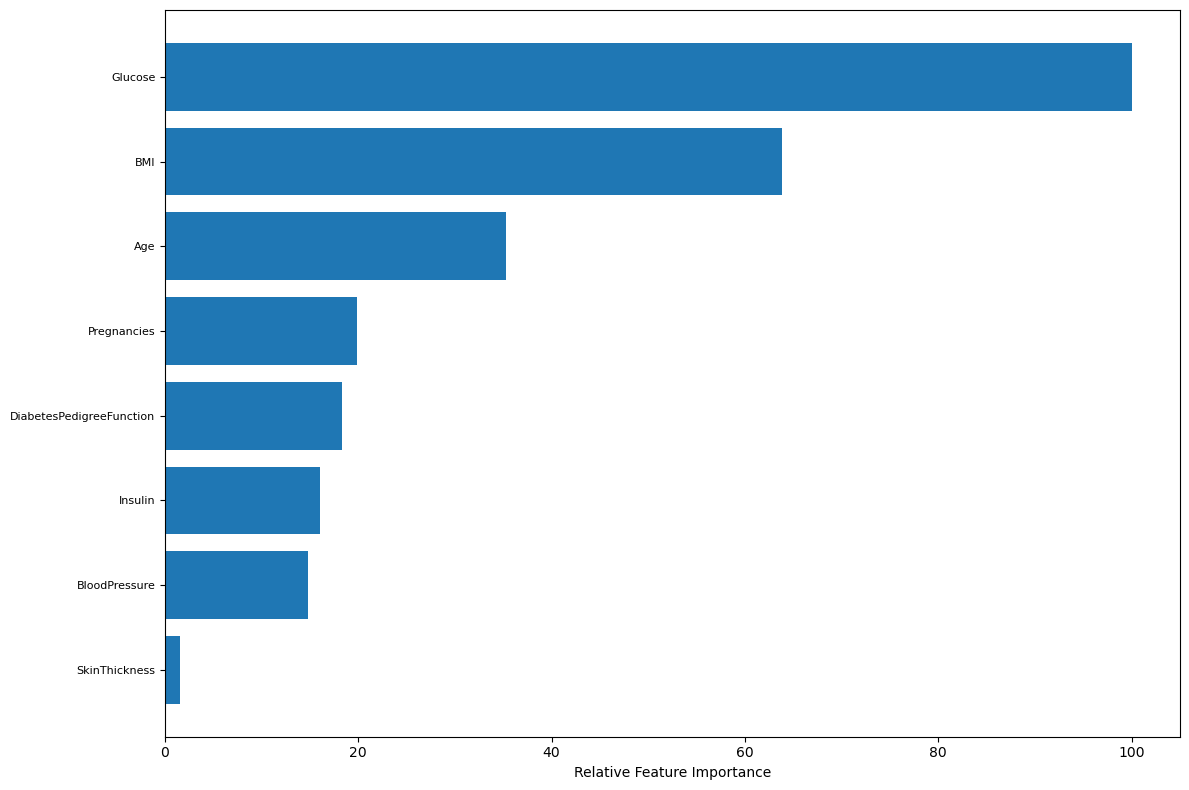

In [26]:
#plotting feature importance
feature_importance = abs(logi.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .3

featfig = plt.figure(figsize=(12,8))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(x_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [27]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(x,y)

SVC(kernel='linear')

In [28]:
y_predict_svm = svm.predict(x_test)
acc= accuracy_score(y_test, y_predict_svm)
roc=roc_auc_score(y_test, y_predict_svm)
prec = precision_score(y_test, y_predict_svm)
rec = recall_score(y_test, y_predict_svm)
f1 = f1_score(y_test, y_predict_svm)

results = pd.DataFrame([['Support Vector Machine',acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Machine,0.779221,0.723404,0.618182,0.666667,0.743434


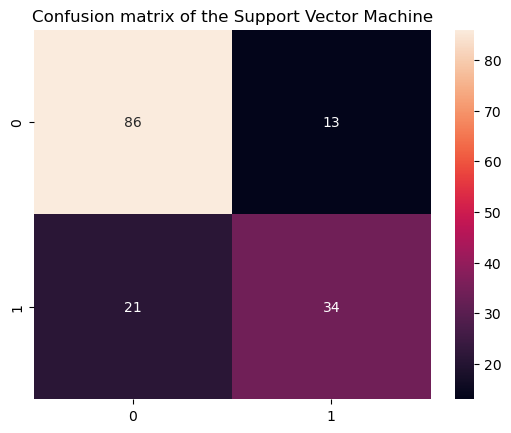

In [29]:
cm_svm = confusion_matrix(y_test, y_predict_svm)
plt.title('Confusion matrix of the Support Vector Machine')
sns.heatmap(cm_svm,annot=True,fmt="d")
plt.show()

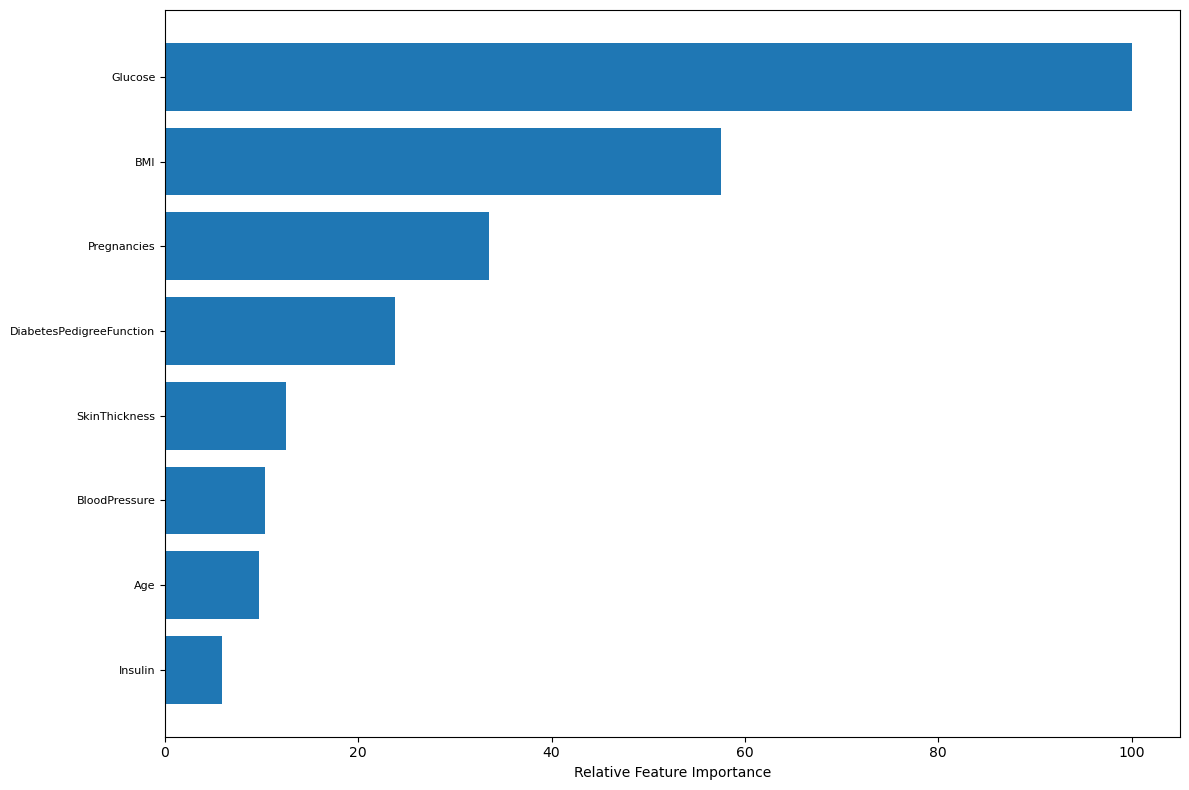

In [30]:
#plotting feature importance
feature_importance = abs(svm.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .3

featfig = plt.figure(figsize=(12,8))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(x_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x,y)

GaussianNB()

In [32]:
y_predict_gnb = gnb.predict(x_test)
acc= accuracy_score(y_test, y_predict_gnb)
roc=roc_auc_score(y_test, y_predict_gnb)
prec = precision_score(y_test, y_predict_gnb)
rec = recall_score(y_test, y_predict_gnb)
f1 = f1_score(y_test, y_predict_gnb)

results = pd.DataFrame([['Guassian Naive Bayes',acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Guassian Naive Bayes,0.75974,0.660714,0.672727,0.666667,0.740404


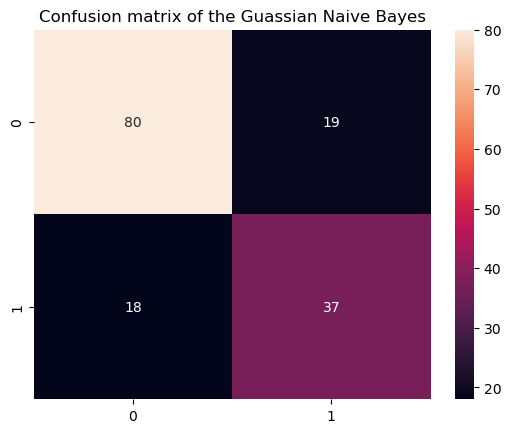

In [33]:
cm_gnb = confusion_matrix(y_test, y_predict_gnb)
plt.title('Confusion matrix of the Guassian Naive Bayes')
sns.heatmap(cm_gnb,annot=True,fmt="d")
plt.show()

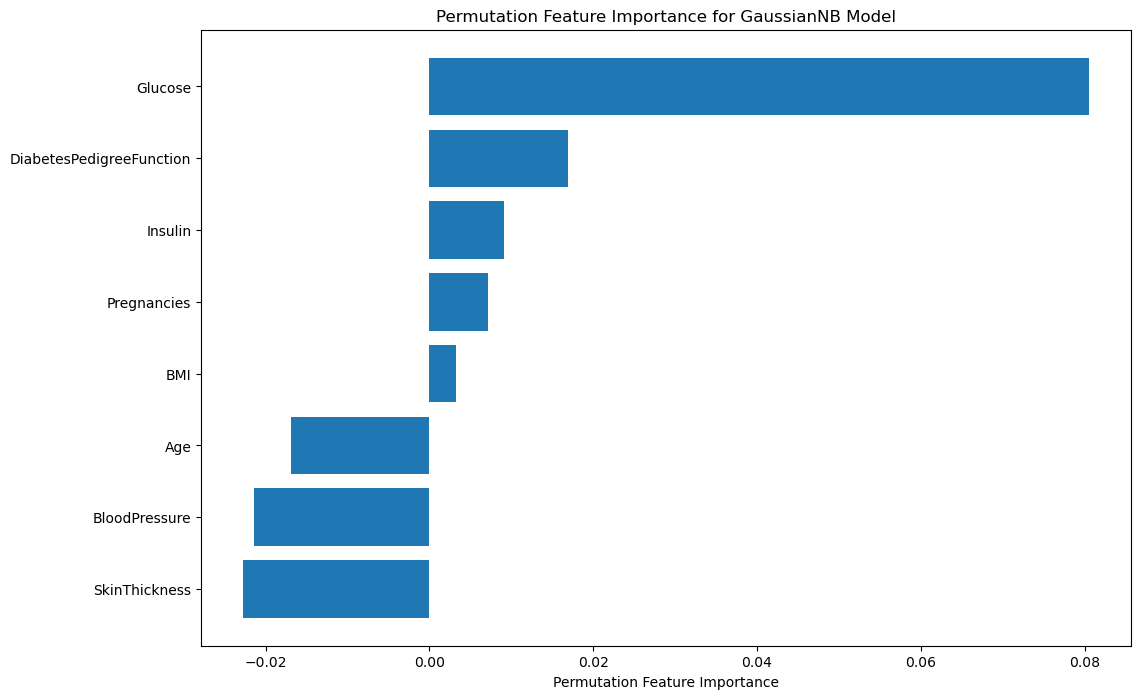

In [34]:
from sklearn.inspection import permutation_importance
# Compute permutation feature importance
result = permutation_importance(gnb, x_test, y_test, n_repeats=10, random_state=42)

# Sort the feature importance values and indices
sorted_idx = result.importances_mean.argsort()

# Plot the permutation feature importance
plt.figure(figsize=(12, 8))
plt.barh(np.arange(len(x_train.columns)), result.importances_mean[sorted_idx])
plt.yticks(np.arange(len(x_train.columns)), np.array(x_train.columns)[sorted_idx])
plt.xlabel('Permutation Feature Importance')
plt.title('Permutation Feature Importance for GaussianNB Model')
plt.show()


In [35]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
y_predict_r = rf.predict(x_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

results = pd.DataFrame([['Random Forest (Untuned)',acc, prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest (Untuned),0.746753,0.642857,0.654545,0.648649,0.726263


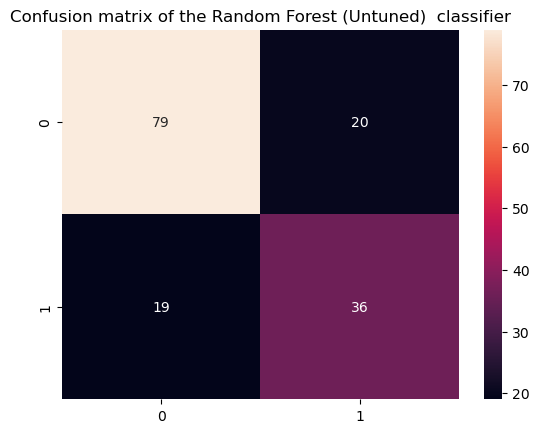

In [37]:
cm_r = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the Random Forest (Untuned)  classifier')
sns.heatmap(cm_r,annot=True,fmt="d")
plt.show()

<Axes: >

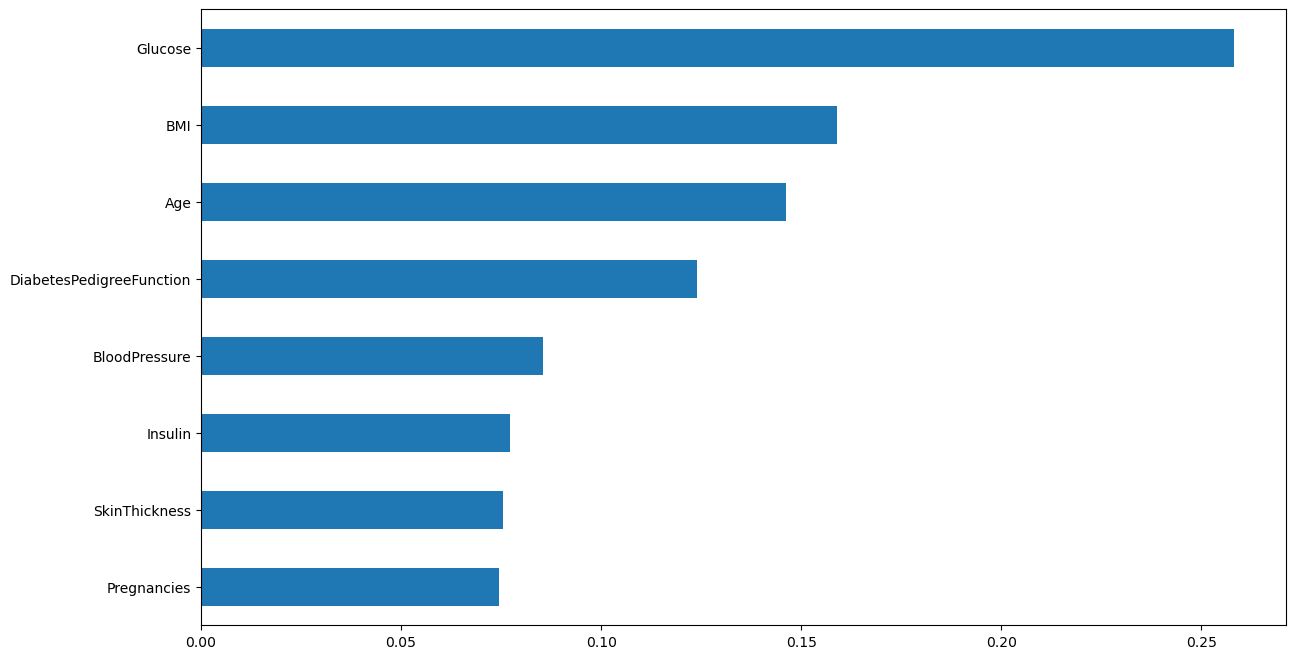

In [38]:
feat_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(14, 8))

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
dtree.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [40]:
y_predict_dtree = dtree.predict(x_test)
roc=roc_auc_score(y_test, y_predict_dtree)
acc = accuracy_score(y_test, y_predict_dtree)
prec = precision_score(y_test, y_predict_dtree)
rec = recall_score(y_test, y_predict_dtree)
f1 = f1_score(y_test, y_predict_dtree)

results = pd.DataFrame([['Decision tree',acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision tree,0.883117,0.877551,0.781818,0.826923,0.860606


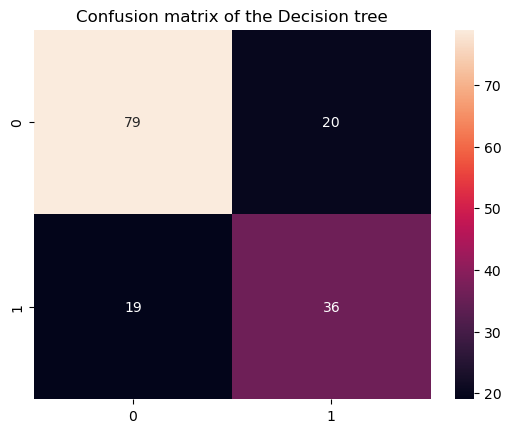

In [41]:
cm_dtree = confusion_matrix(y_test, y_predict_dtree)
plt.title('Confusion matrix of the Decision tree')
sns.heatmap(cm_r,annot=True,fmt="d")
plt.show()

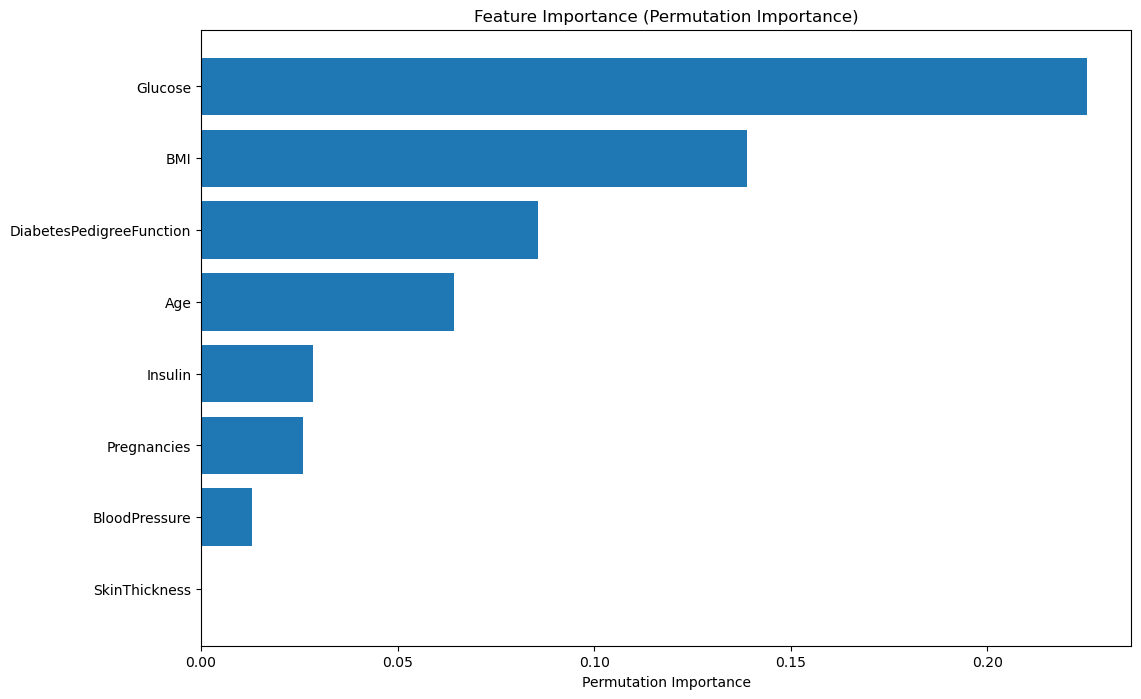

In [42]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(dtree, x_test, y_test, n_repeats=10, random_state=42)

# Get feature importances
sorted_idx = perm_importance.importances_mean.argsort()

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_train.columns)[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation Importance)')
plt.show()


In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x,y)

KNeighborsClassifier()

In [44]:
y_predict_knn = knn.predict(x_test)
acc= accuracy_score(y_test, y_predict_knn)
roc=roc_auc_score(y_test, y_predict_knn)
prec = precision_score(y_test, y_predict_knn)
rec = recall_score(y_test, y_predict_knn)
f1 = f1_score(y_test, y_predict_knn)

results = pd.DataFrame([['K-Neighbours Classifier',acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Neighbours Classifier,0.863636,0.793103,0.836364,0.814159,0.857576


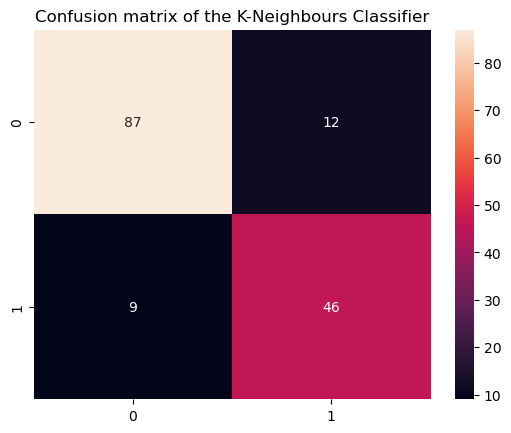

In [45]:
cm_knn= confusion_matrix(y_test, y_predict_knn)
plt.title('Confusion matrix of the K-Neighbours Classifier')
sns.heatmap(cm_knn,annot=True,fmt="d")
plt.show()

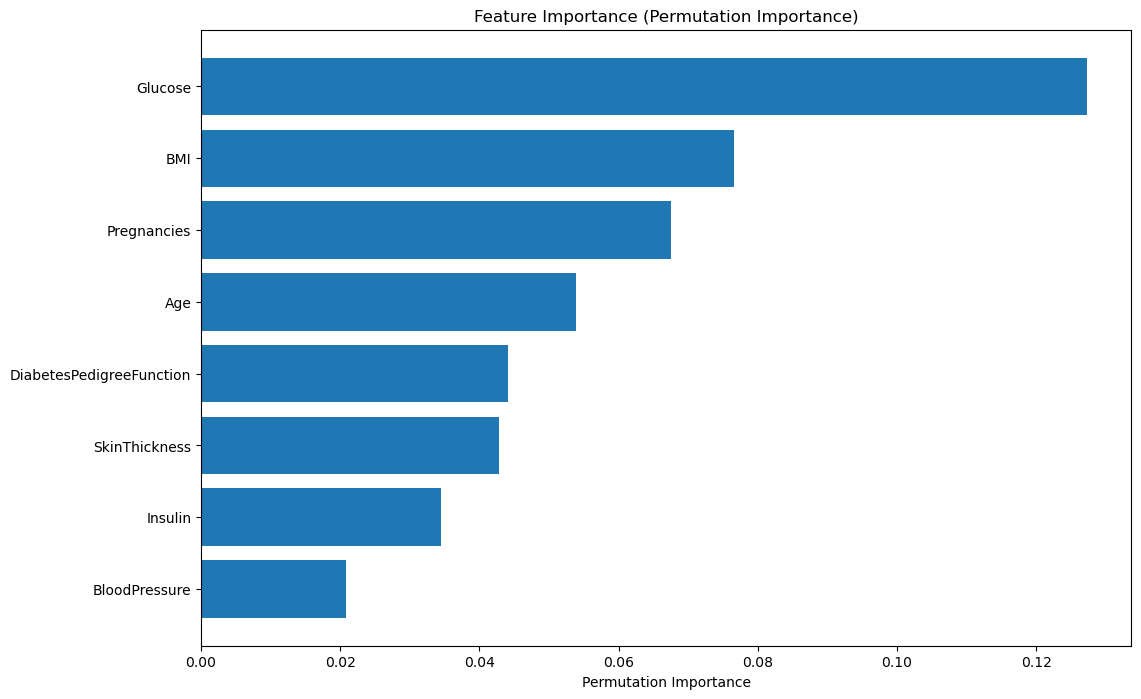

In [46]:
from sklearn.inspection import permutation_importance
# Calculate permutation importance
perm_importance = permutation_importance(knn, x_test, y_test, n_repeats=10, random_state=42)

# Get feature importances
sorted_idx = perm_importance.importances_mean.argsort()

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_train.columns)[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation Importance)')
plt.show()


In [47]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x,y)

AdaBoostClassifier(base_estimator=None)

In [48]:
y_predict_adb = adb.predict(x_test)
roc=roc_auc_score(y_test, y_predict_adb)
acc = accuracy_score(y_test, y_predict_adb)
prec = precision_score(y_test, y_predict_adb)
rec = recall_score(y_test, y_predict_adb)
f1 = f1_score(y_test, y_predict_adb)

results = pd.DataFrame([['Adaboost Classifier',acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Adaboost Classifier,0.805195,0.735849,0.709091,0.722222,0.783838


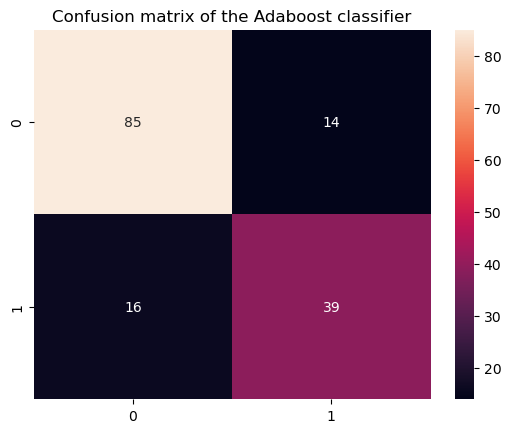

In [49]:
cm_adb = confusion_matrix(y_test, y_predict_adb)
plt.title('Confusion matrix of the Adaboost classifier')
sns.heatmap(cm_adb,annot=True,fmt="d")
plt.show()

<Axes: >

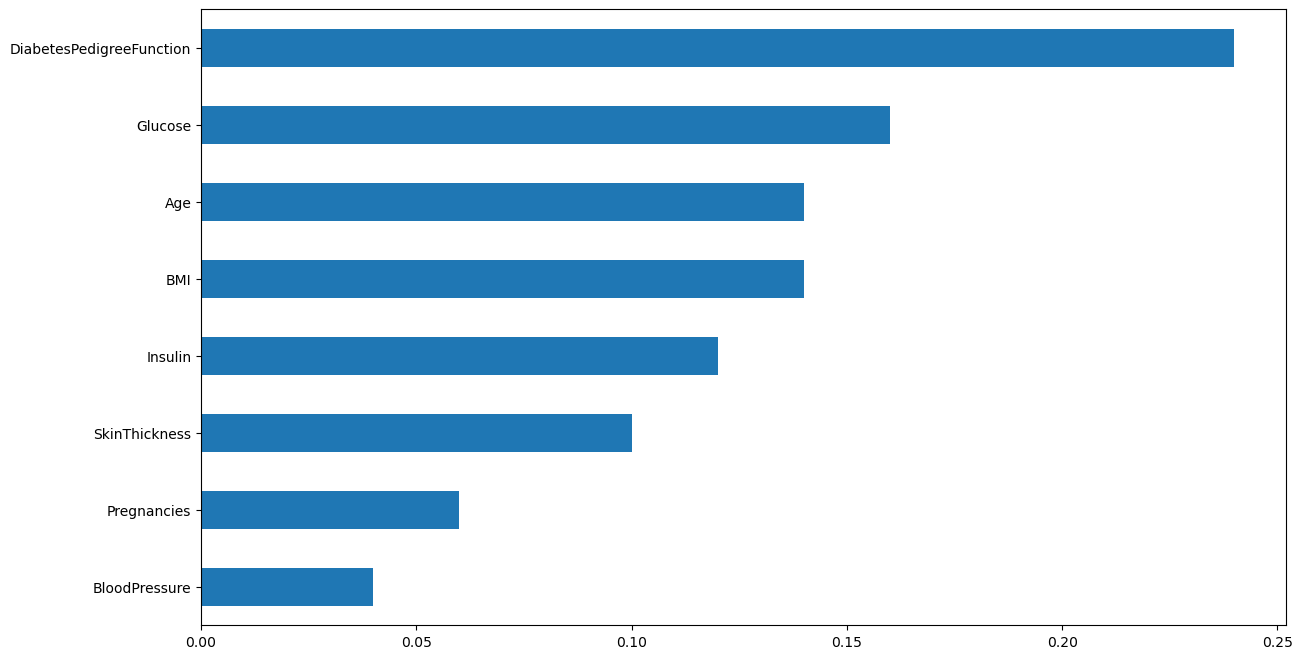

In [50]:
feat_importances = pd.Series(adb.feature_importances_, index=x_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(14, 8))

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x,y)

GradientBoostingClassifier()

In [52]:
y_predict_gbc = gbc.predict(x_test)
roc=roc_auc_score(y_test, y_predict_gbc)
acc = accuracy_score(y_test, y_predict_gbc)
prec = precision_score(y_test, y_predict_gbc)
rec = recall_score(y_test, y_predict_gbc)
f1 = f1_score(y_test, y_predict_gbc)

results = pd.DataFrame([['Gradient Boost Classifier',acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Gradient Boost Classifier,0.915584,0.903846,0.854545,0.878505,0.90202
